In [33]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

In [34]:
#load data
iris=datasets.load_iris()
features=iris.data
target=iris.target
print(features)
print(target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [35]:
#create logistic regression
logistic=linear_model.LogisticRegression(max_iter=1000,solver='liblinear')
print(logistic)

LogisticRegression(max_iter=1000, solver='liblinear')


In [36]:
#create range of candidate regularization
penalty=['l1','l2']
C=np.logspace(0,4,10)
hyperparameters=dict(C=C,penalty=penalty)
print(hyperparameters)

{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2']}


In [37]:
#create grid search
gridsearch=GridSearchCV(logistic,hyperparameters,cv=5,verbose=0)
best_model=gridsearch.fit(features,target)
#show the best model
print('Best Penalty:',best_model.best_estimator_.get_params()['penalty'])
print('Best C:',best_model.best_estimator_.get_params()['C'])
print('Best Score:',best_model.best_score_)

Best Penalty: l1
Best C: 7.742636826811269
Best Score: 0.9800000000000001


In [38]:
#perdict the target vector
best_model.predict(features)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
features = data.data
target = data.target
print(features)
print(target)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [40]:
#create logistic regression
logistic=linear_model.LogisticRegression(max_iter=1000,solver='liblinear')
print(logistic)

LogisticRegression(max_iter=1000, solver='liblinear')


In [41]:
penalty=['l1','l2']
C=np.logspace(0,4,10)
hyperparameters=dict(C=C,penalty=penalty)
print(hyperparameters)

{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2']}


In [42]:
gridsearch=GridSearchCV(logistic,hyperparameters,cv=5,verbose=0)
best_model=gridsearch.fit(features,target)
print('Best Penalty:',best_model.best_estimator_.get_params()['penalty'])
print('Best C:',best_model.best_estimator_.get_params()['C'])
print('Best Score:',best_model.best_score_)
best_model.predict(features)

Best Penalty: l1
Best C: 59.94842503189409
Best Score: 0.9666045645086168


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [117]:
!pip install --upgrade numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 74.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [118]:
# Load the breast cancer dataset
data = load_breast_cancer()


In [120]:
# Create a DataFrame from the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df)
print(df.columns)

     mean radius  mean texture  mean perimeter  ...  worst symmetry  worst fractal dimension  target
0          17.99         10.38          122.80  ...          0.4601                  0.11890       0
1          20.57         17.77          132.90  ...          0.2750                  0.08902       0
2          19.69         21.25          130.00  ...          0.3613                  0.08758       0
3          11.42         20.38           77.58  ...          0.6638                  0.17300       0
4          20.29         14.34          135.10  ...          0.2364                  0.07678       0
..           ...           ...             ...  ...             ...                      ...     ...
564        21.56         22.39          142.00  ...          0.2060                  0.07115       0
565        20.13         28.25          131.20  ...          0.2572                  0.06637       0
566        16.60         28.08          108.30  ...          0.2218                  0.0782

In [121]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

(569, 31)

In [122]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [123]:
df.corr(numeric_only=True)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [124]:
df.values
#object
print(df.dtypes)
print(df.shape)
print(df.describe())
print(df.info())
print(df.corr(numeric_only=True))
print(df.isnull().sum())

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [125]:
# Step 4: Check for duplicates
duplicates = df.duplicated()
print(duplicates)
print(df.columns)

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


In [126]:
#  Check for outliers (optional, using IQR method)
# Select only numeric columns for outlier detection
numeric_df = df.select_dtypes(include=np.number)
print(numeric_df)

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
print(outliers)

     mean radius  mean texture  mean perimeter  ...  worst symmetry  worst fractal dimension  target
0          17.99         10.38          122.80  ...          0.4601                  0.11890       0
1          20.57         17.77          132.90  ...          0.2750                  0.08902       0
2          19.69         21.25          130.00  ...          0.3613                  0.08758       0
3          11.42         20.38           77.58  ...          0.6638                  0.17300       0
4          20.29         14.34          135.10  ...          0.2364                  0.07678       0
..           ...           ...             ...  ...             ...                      ...     ...
564        21.56         22.39          142.00  ...          0.2060                  0.07115       0
565        20.13         28.25          131.20  ...          0.2572                  0.06637       0
566        16.60         28.08          108.30  ...          0.2218                  0.0782

In [127]:
# Check outliers for a few columns as an example
outliers_example = df[outliers]
print(outliers_example)


     mean radius  mean texture  mean perimeter  ...  worst symmetry  worst fractal dimension  target
0          17.99         10.38          122.80  ...          0.4601                  0.11890       0
1          20.57         17.77          132.90  ...          0.2750                  0.08902       0
2          19.69         21.25          130.00  ...          0.3613                  0.08758       0
3          11.42         20.38           77.58  ...          0.6638                  0.17300       0
4          20.29         14.34          135.10  ...          0.2364                  0.07678       0
..           ...           ...             ...  ...             ...                      ...     ...
563        20.92         25.09          143.00  ...          0.2929                  0.09873       0
564        21.56         22.39          142.00  ...          0.2060                  0.07115       0
565        20.13         28.25          131.20  ...          0.2572                  0.0663

In [128]:
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())


Data types:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst s

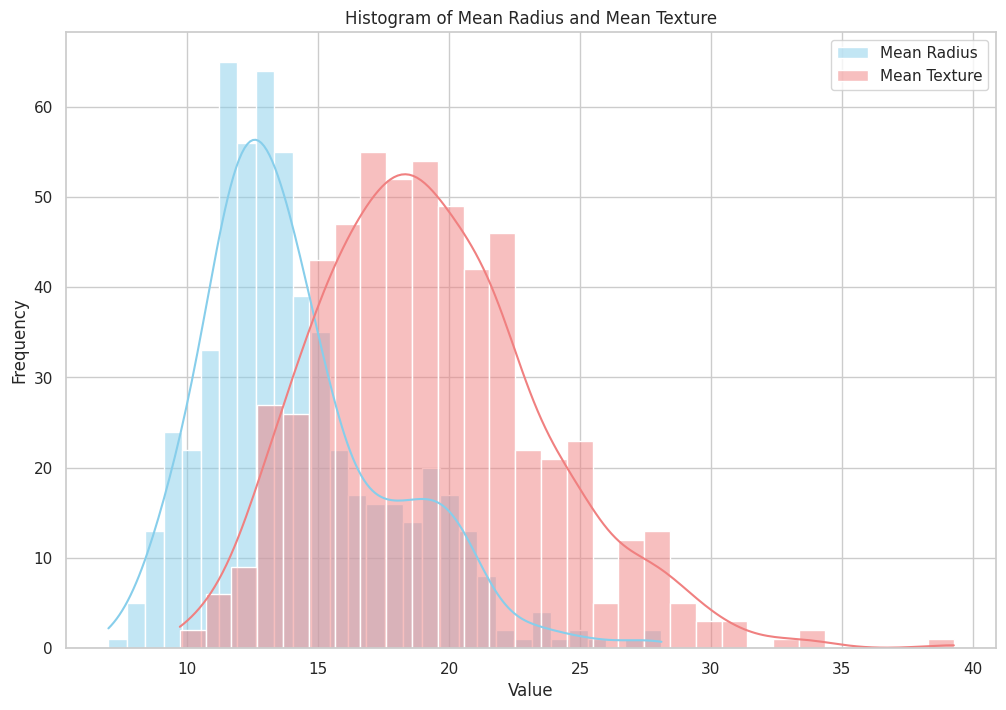

In [129]:
# Set up the plotting style
sns.set(style="whitegrid")
# 1. Histogram of a few key features
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='mean radius', bins=30, kde=True, color='skyblue', label='Mean Radius')
sns.histplot(data=df, x='mean texture', bins=30, kde=True, color='lightcoral', label='Mean Texture')
plt.title('Histogram of Mean Radius and Mean Texture')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


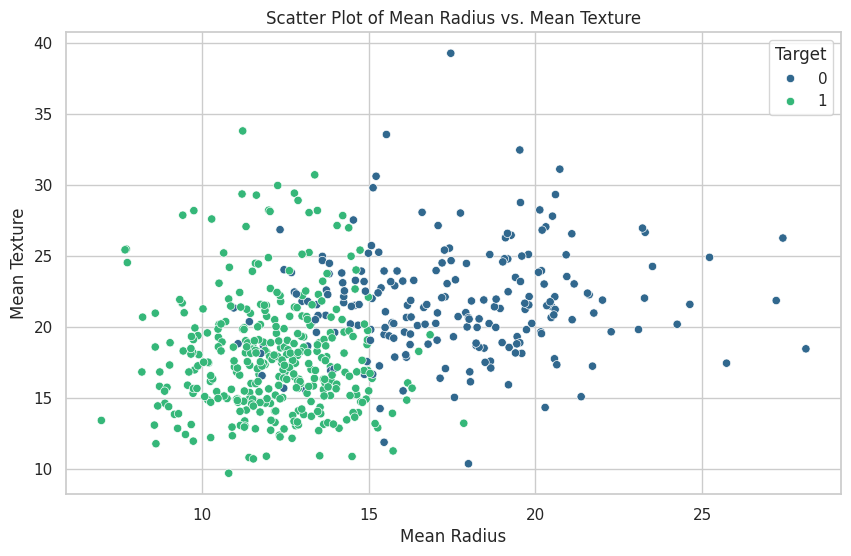

In [130]:
# 2. Scatter plot to explore relationships (e.g., radius_mean vs. texture_mean)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mean radius', y='mean texture', hue='target', palette='viridis')
plt.title('Scatter Plot of Mean Radius vs. Mean Texture')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend(title='Target', loc='upper right')
plt.show()

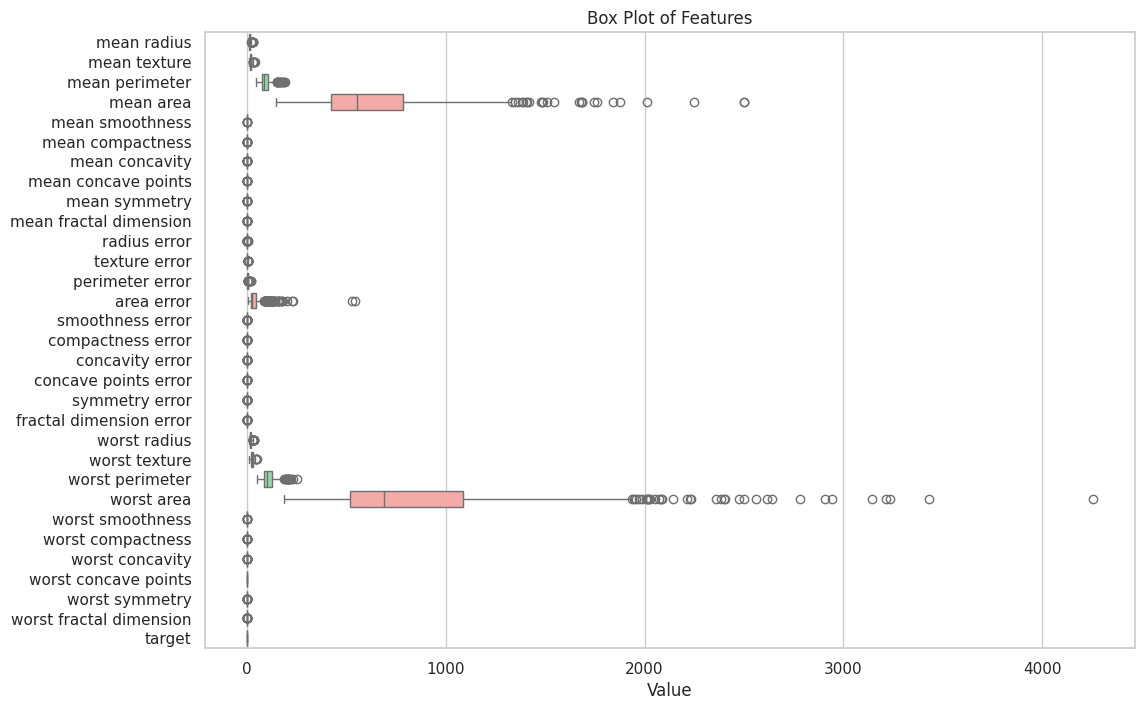

In [131]:
# 3. Box plot to visualize outliers and spread
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h', palette='pastel')
plt.title('Box Plot of Features')
plt.xlabel('Value')
plt.show()

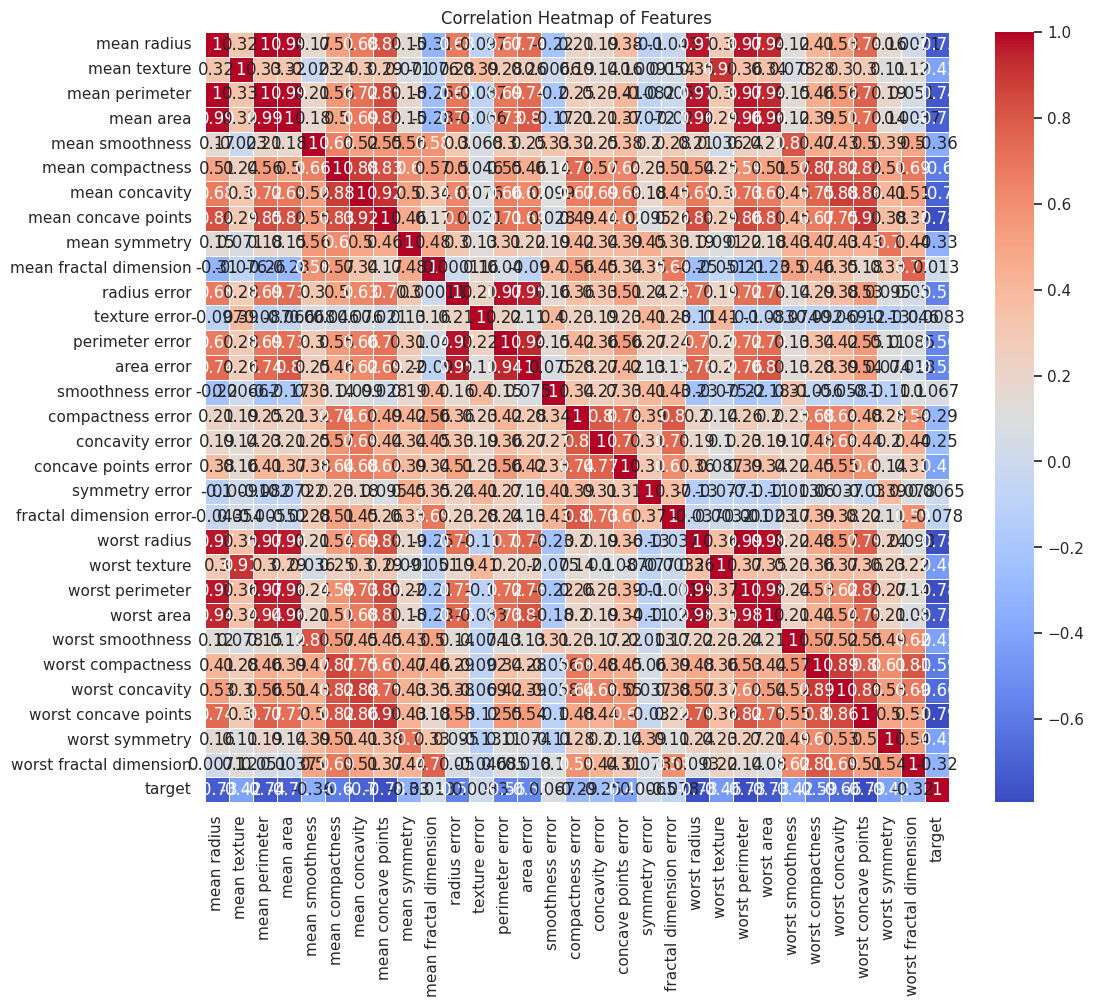

In [132]:
# 4. Correlation heatmap of all features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


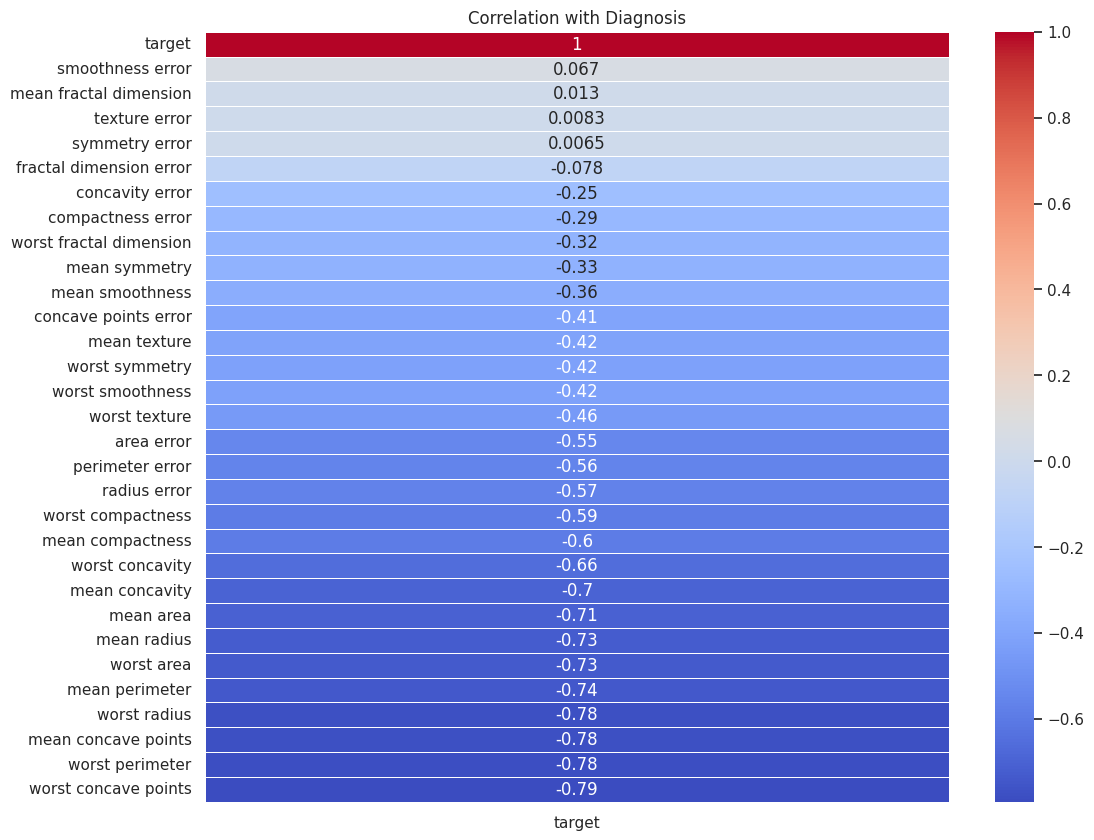

In [133]:
# Optional: Zoom in on correlations with Diagnosis
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with Diagnosis')
plt.show()


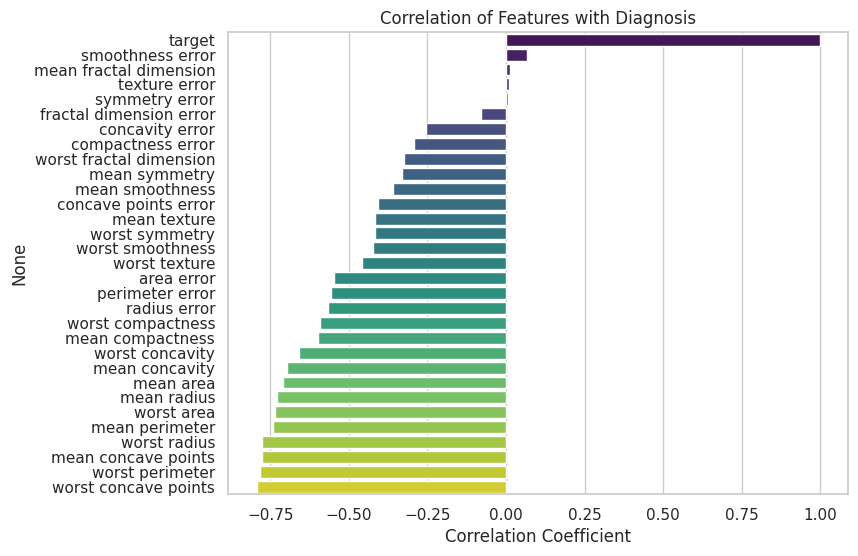

In [134]:
# Optional: Zoom in on correlations with Diagnosis
plt.figure(figsize=(8, 6))
# Calculate the correlation matrix and assign it to correlation_matrix
correlation_matrix = df.corr(numeric_only=True)
# Access the 'target' column (renamed from 'Diagnosis')
diagnosis_corr = correlation_matrix['target'].sort_values(ascending=False)
sns.barplot(x=diagnosis_corr.values, y=diagnosis_corr.index, palette='viridis')
plt.title('Correlation of Features with Diagnosis')
plt.xlabel('Correlation Coefficient')
plt.show()

In [135]:
#  Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
68         9.029         17.33  ...          0.4228                  0.11750
181       21.090         26.57  ...          0.4098                  0.12840
63         9.173         13.86  ...          0.3282                  0.08490
248       10.650         25.22  ...          0.3409                  0.08147
60        10.170         14.88  ...          0.3557                  0.08020
..           ...           ...  ...             ...                      ...
71         8.888         14.64  ...          0.2254                  0.10840
106       11.640         18.33  ...          0.2806                  0.09097
270       14.290         16.82  ...          0.2458                  0.06120
435       13.980         19.62  ...          0.3179                  0.10550
102       12.180         20.52  ...          0.2694                  0.06878

[455 rows x 30 columns]
     mean radius  mean texture  ...  worst symmetry

In [136]:
#define the model
model=linear_model.LogisticRegression(max_iter=1000,solver='liblinear')
print(model)


LogisticRegression(max_iter=1000, solver='liblinear')


In [139]:
#create range of candidates penalty hyperparameter values
penalty=['l1','l2']
C=np.logspace(0,4,10)
hyperparameters=dict(C=C,penalty=penalty)
print(hyperparameters)

{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2']}


In [140]:
#create grid search
gridsearch=GridSearchCV(model,hyperparameters,cv=5,verbose=0)
best_model=gridsearch.fit(X_train,y_train)


In [141]:
#fit the grid search
best_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [144]:
#show the best model
print('Best Penalty:',best_model.best_estimator_.get_params()['penalty'])
print('Best C:',best_model.best_estimator_.get_params()['C'])
print('Best Score:',best_model.best_score_)
print(best_model)
print(best_model.best_estimator_)
best_model.predict(X_test)

Best Penalty: l1
Best C: 59.94842503189409
Best Score: 0.9692307692307693
GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})
LogisticRegression(C=np.float64(59.94842503189409), max_iter=1000, penalty='l1',
                   solver='liblinear')


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [149]:
#create distribution of candiadate regularization penalty hyperparmeter values
penalty=['l1','l2']


In [153]:
from scipy.stats import uniform
C=uniform(loc=0,scale=4)
hyperparameters=dict(C=C,penalty=penalty)
print(hyperparameters)


{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ad07ba46350>, 'penalty': ['l1', 'l2']}


In [156]:
#create randomized search
from sklearn.model_selection import RandomizedSearchCV
randomizedsearch=RandomizedSearchCV(model,hyperparameters,random_state=1,n_iter=100,cv=5,verbose=0,n_jobs=-1)
best_model=randomizedsearch.fit(X_train,y_train)
best_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000,
                                                solver='liblinear'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ad07ba46350>,
                                        'penalty': ['l1', 'l2']},
                   random_state=1)

In [157]:
best_model=randomizedsearch.fit(X_train,y_train)
print(best_model.best_estimator_)
print(best_model.best_score_)
print(best_model.best_estimator_.get_params()['penalty'])
print(best_model.best_estimator_.get_params()['C'])
best_model.predict(X_test)
print(best_model)


LogisticRegression(C=np.float64(1.9924362785129461), max_iter=1000,
                   penalty='l1', solver='liblinear')
0.9604395604395604
l1
1.9924362785129461
RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000,
                                                solver='liblinear'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ad07ba46350>,
                                        'penalty': ['l1', 'l2']},
                   random_state=1)


In [158]:
#predict target
best_model.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])